In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import h5py

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [2]:
import wdgts
import utils
from importlib import reload

wdgts = reload(wdgts)
utils = reload(utils)
test_case = wdgts.test_case
labels = wdgts.labels
time_step = wdgts.time_step

converter = utils.converter()

test_case.observe(
    lambda c: converter.update_test_case(c['new']) if (c['type'] == 'change' and c['name'] == 'value') else None
                 )
display(test_case)

labels.observe(
    lambda c: converter.update_label(c['new']) if (c['type'] == 'change' and c['name'] == 'value') else None
              )
display(labels)

display(time_step)
time_step.on_submit(lambda c: converter.update_time_step(str(c.value)))

bb = widgets.Button(
    description='Click me',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='check'
)
display(bb)
bb.on_click(lambda c: converter.convert())

Dropdown(description='test case:', index=1, options=(('travelling vortex', 1), ('acoustic wave high', 2), ('lo…

Dropdown(description='time label:', index=9, options=(('initial condition', 'ic'), ('before first advection ro…

Text(value='000', description='time-step:')

Button(description='Click me', icon='check', style=ButtonStyle(), tooltip='Click me')

In [3]:
# utils = reload(utils)

# test_case.observe(
#     lambda c: cv.update_test_case(c['new']) if (c['type'] == 'change' and c['name'] == 'value') else None
#                  )
# display(test_case)

# labels.observe(
#     lambda c: cv.update_label(c['new']) if (c['type'] == 'change' and c['name'] == 'value') else None
#               )
# display(labels)

# display(time_step)
# time_step.on_submit(lambda c: cv.update_time_step(str(c.value)))

_000_after_full_step.h5
_000_after_full_step.h5
000_after_full_step
[300.25 300.5  300.75 301.   301.25 301.5  301.75 302.  ]
1.1020269
0.9019835


/home/ray/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: No contour levels were found within the data range.
  if __name__ == '__main__':


IndexError: index 2 is out of bounds for axis 0 with size 2

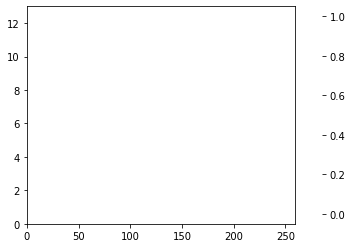

In [4]:
converter.c_visualise()
print(converter.string_h5)
print(converter.time)

lvls = np.arange(300.25,302.01,0.25)
print(lvls)

fig = plt.figure(figsize=(6,4))
plt.contour(converter.c.rhoY[:].T / converter.c.rho[:].T * 300, levels=lvls)
# plt.contour(converter.c.rhov[:].T)
print(converter.c.rhoY[:].max())
print(converter.c.rhoY[:].min())
plt.colorbar()
plt.show()

In [8]:
py_filename = "output_rising_bubble_low_mach_gravity_comp.h5"

# specify directory where the python hdf5 output is.
# py_directory = "../RKLM_Python/"
py_directory = "../"

py_path = py_directory + py_filename

fc = h5py.File(py_path, 'r')
tnow = '_' + '015' + '_' + 'after_full_step'
tm1 = '_' + '014' + '_' + 'after_full_step'
pref = 8.61 * 1e4

# lvls = np.arange(-3.0,3.0+0.1,0.6)
# print(lvls)
# plt.contour( (py_out(fc,'p2_nodes',time=tnow).T - py_out(fc,'p2_nodes',time=tm1).T) * pref / 10)

# plt.colorbar()

time = np.arange(0,200)

lst = []
for t in time:
    if t < 100:
        t_label = '_0' + str(t) + '_' + 'after_full_step'
    else:
        t_label = '_' + str(t) + '_' + 'after_full_step'
        
    lst.append(py_out(fc,'p2_nodes',time=t_label)[60][40])

lst = (np.array(lst) * pref)
lst = lst[:-1] - lst[1:]

plt.plot(lst)
# plt.ylim([-1.5,1.5])


plt.show()

t = '_' + '200' + '_' + 'after_full_step'
plt.contour(py_out(fc,'rhoY',t).T / py_out(fc,'rho',t).T)

fc.close()

NameError: name 'py_out' is not defined

In [9]:


# helper function to extract array from hdf file by its name and timestep
t_label = '000'
t_label = '_' + t_label

label = t_label + '_' + 'ic'
label = t_label + '_' + 'after_full_step'

def py_out(pyfile,py_dataset,time=label):
    return pyfile[str(py_dataset)][str(py_dataset)+time][:]



In [ ]:
np.linspace(0.0,1.0,10)

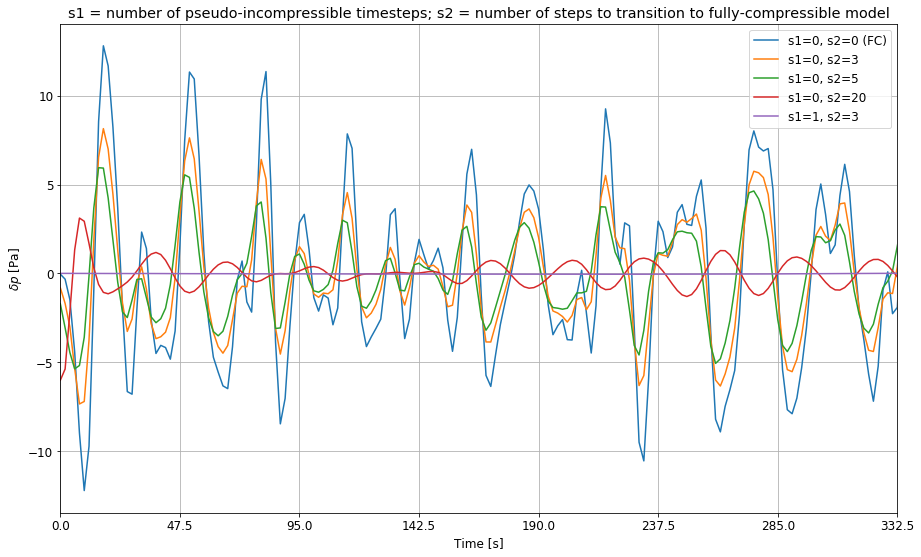

In [60]:
s1 = 0
s2 = 0

def get_file_path(s1,s2):
    py_filename = "output_rising_bubble_s1=" + str(s1) + "_s2=" + str(s2) + "_continuous_blending.h5"

    # specify directory where the python hdf5 output is.
    # py_directory = "../RKLM_Python/"
    py_directory = "../"

    py_path = py_directory + py_filename
    return py_path

# (x,z) = idx(60,40)
# time_step = (26,end)

# bc1 = h5py.File(py_path, 'r')
# idx = [60,40]
time = np.arange(0,200)

def get_time_series(file,time):
    lst = []
    for t in time:
        if t < 10:
            t_label = '_00' + str(t) + '_' + 'after_full_step'
        elif t < 100:
            t_label = '_0' + str(t) + '_' + 'after_full_step'
        else:
            t_label = '_' + str(t) + '_' + 'after_full_step'

        lst.append(py_out(file,'p2_nodes',time=t_label)[60][40])

    lst = (np.array(lst) * pref)
    lst = lst[:-1] - lst[1:]

    return lst

def test_case(time,s1,s2):
    path = get_file_path(s1,s2)
    file = h5py.File(path,'r')
    file_lst = get_time_series(file, time)
    file.close()
    return file_lst

fc_lst = test_case(time,0,0)
bc1_lst = test_case(time,0,3)
bc2_lst = test_case(time,0,5)
bc3_lst = test_case(time,0,20)
bc4_lst = test_case(time,1,3)
bc5_lst = test_case(time,1,0)

fig = plt.figure(figsize=(15,9))
plt.plot(fc_lst, label='s1=0, s2=0 (FC)')
plt.plot(bc1_lst, label='s1=0, s2=3')
plt.plot(bc2_lst, label='s1=0, s2=5')
plt.plot(bc3_lst, label='s1=0, s2=20')
plt.plot(bc4_lst, label='s1=1, s2=3')
# plt.plot(bc5_lst, label='s1=1, s2=0')
plt.legend()
plt.xlim([0,160])
plt.xticks(np.arange(0,200,25), 1.9 * np.arange(0,200,25))
plt.xlabel(r'Time [s]')
plt.ylabel(r'$\delta p$ [Pa]')
plt.title('s1 = number of pseudo-incompressible timesteps; s2 = number of steps to transition to fully-compressible model')
# plt.ylim([-1.5,1.5])
plt.grid(True)
plt.rcParams["font.size"] = "12"

plt.show()

# t = '_' + '200' + '_' + 'after_full_step'
# plt.contour(py_out(bc1,'rhoY',t).T / py_out(bc1,'rho',t).T)
# plt.show()

# print(lst)
tnow = '_' + '015' + '_' + 'after_full_step'
tm1 = '_' + '014' + '_' + 'after_full_step'
pref = 8.61 * 10**4
R_gas = 287.4

def calc(arr):
    return pref * (R_gas / pref * arr)**1.4

# plt.pcolor( (calc(py_out(bc1,'p2_nodes',time=tnow).T) - calc(py_out(bc1,'p2_nodes',time=tm1).T)))
# plt.contour( (py_out(bc1,'p2_nodes',time=tnow).T - py_out(bc1,'p2_nodes',time=tm1).T) * pref)

# plt.colorbar()

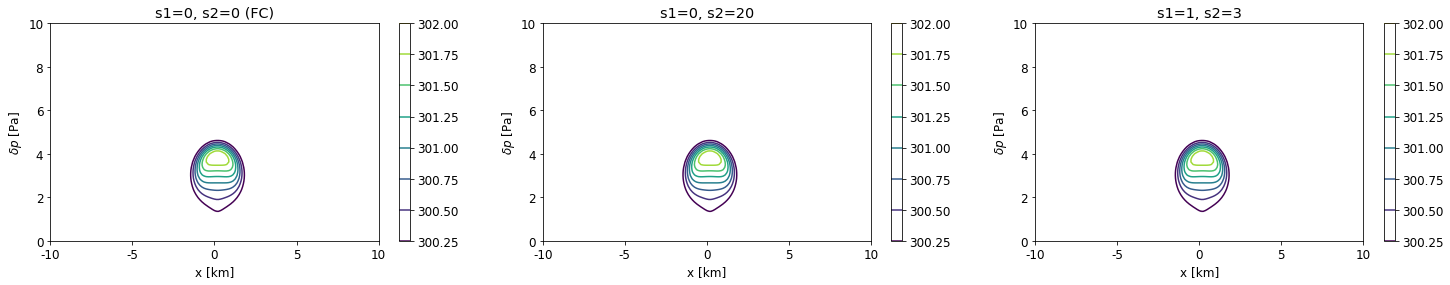

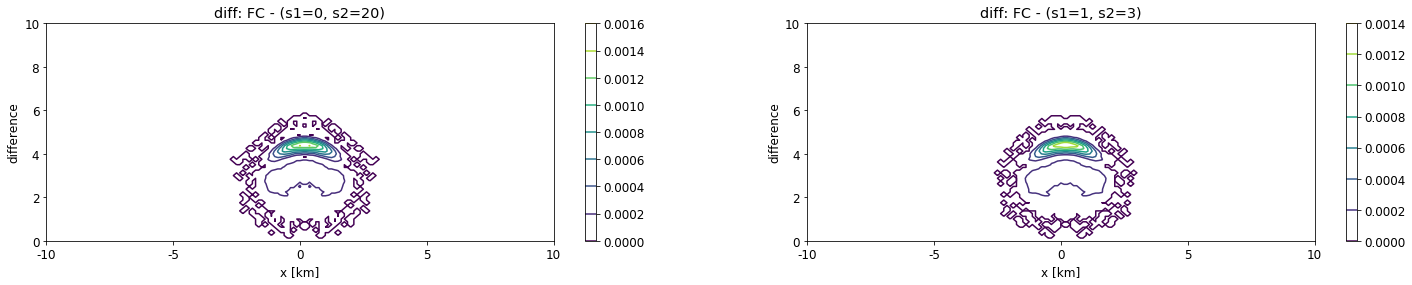

In [56]:
def test_case(time,s1,s2):
    path = get_file_path(s1,s2)
    file = h5py.File(path,'r')
    
    for t in time:
        if t < 10:
            t_label = '_00' + str(t) + '_' + 'after_full_step'
        elif t < 100:
            t_label = '_0' + str(t) + '_' + 'after_full_step'
        else:
            t_label = '_' + str(t) + '_' + 'after_full_step'

    temp_perturb = (py_out(file,'rhoY',time=t_label) / py_out(file,'rho',time=t_label)).T * 300

    file.close()
    return temp_perturb

time = [200]
fc = test_case(time,0,0)
bc1 = test_case(time,0,20)
bc2 = test_case(time,1,3)

lvls = np.arange(300.25,302.01,0.25)

figsize_tuple = (25,4)
fig, ax = plt.subplots(ncols=3, figsize=figsize_tuple)
# plot c array
im_fc = ax[0].contour(fc, levels=lvls)
fig.colorbar(im_fc,ax=ax[0])
ax[0].set_title("s1=0, s2=0 (FC)")
ax[0].set_aspect('auto')
ax[0].set_xticks([0,40,80,120,160])
ax[0].set_xticklabels(np.arange(-10,10+1,5))
ax[0].set_xlim([0,160])

# plot python array
im_bc1 = ax[1].contour(bc1, levels=lvls)
fig.colorbar(im_bc1,ax=ax[1])
ax[1].set_title("s1=0, s2=20")
ax[1].set_aspect('auto')

# plot the difference between the two
im_bc2 = ax[2].contour(bc2, levels=lvls)
fig.colorbar(im_bc2,ax=ax[2])
ax[2].set_title("s1=1, s2=3")
ax[2].set_aspect('auto')

plt.setp(ax, xlim=[0,160], ylim=[0,80], xlabel="x [km]", ylabel=r"$\delta p$ [Pa]", xticks=[0,40,80,120,160], xticklabels=np.arange(-10,10+1,5), yticks=[0,16,32,48,64,80], yticklabels=np.arange(0,11,2))
plt.show()


figsize_tuple = (25,4)
fig, ax = plt.subplots(ncols=2, figsize=figsize_tuple)
# plot c array
im_diff1 = ax[0].contour(np.abs(fc - bc1))
fig.colorbar(im_diff1,ax=ax[0])
ax[0].set_title("diff: FC - (s1=0, s2=20)")
ax[0].set_aspect('auto')

# plot python array
im_diff2 = ax[1].contour(np.abs(fc - bc2))
fig.colorbar(im_diff2,ax=ax[1])
ax[1].set_title("diff: FC - (s1=1, s2=3)")
ax[1].set_aspect('auto')

# plot the difference between the two
# im_bc2 = ax[2].contour(bc2, levels=lvls)
# fig.colorbar(im_bc2,ax=ax[2])
# ax[2].set_title("diff")
# ax[2].set_aspect('auto')

plt.setp(ax, xlim=[0,160], ylim=[0,80], xlabel="x [km]", ylabel=r"difference", xticks=[0,40,80,120,160], xticklabels=np.arange(-10,10+1,5), yticks=[0,16,32,48,64,80], yticklabels=np.arange(0,11,2))
plt.show()